In [42]:
import pandas as pd
import numpy as np
import math

#cs137=pd.read_csv('Cs137-T2-channeldata.csv')
cs137=pd.read_csv('Cs137T3-channeldata.csv')

cs137.columns = ["Channel",	"Energy", "Counts"]
cs137 = cs137.drop(0)
cs137['Counts'] = pd.to_numeric(cs137['Counts'])

total_counts = cs137['Counts'].sum()
std_deviation = cs137['Counts'].std()
avg = cs137['Counts'].mean()
sqrt_avg = np.sqrt(avg)

print("Cs137-T2",
      "Total counts:", int(total_counts),
      "/ Standard Deviation:", std_deviation,
      "/ Mean:", avg,
      "/ Sqrt Mean:", sqrt_avg)



#cs137t3 = pd.read_csv("Cs137T3-channeldata.csv")
#cs137['Counts'] = pd.to_numeric(cs137['Counts'])
#cs137t3

Cs137-T2 Total counts: 1094 / Standard Deviation: 2.1025732850597274 / Mean: 1.0694037145650048 / Sqrt Mean: 1.0341197776684308


In [31]:
cs137

def custom_std_deviation(column):
    n = len(column)
    
    if n <= 1:
        return 0  # Standard deviation is undefined for a single value
    
    mean = column.sum() / n  # Calculate the mean (average)
    
    squared_diff_sum = ((column - mean) ** 2).sum()  # Sum of squared differences from the mean
    
    variance = squared_diff_sum / (n - 1)  # Sample variance (n-1 for sample, use n for population)
    
    std_deviation = math.sqrt(variance)  # Standard deviation is the square root of variance
    
    return std_deviation

print(custom_std_deviation(cs137['Counts']))

166.61765933645796


[ 3  6 17 20 28 12 10  5] [0. 1. 2. 3. 4. 5. 6. 7. 8.] [0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5]


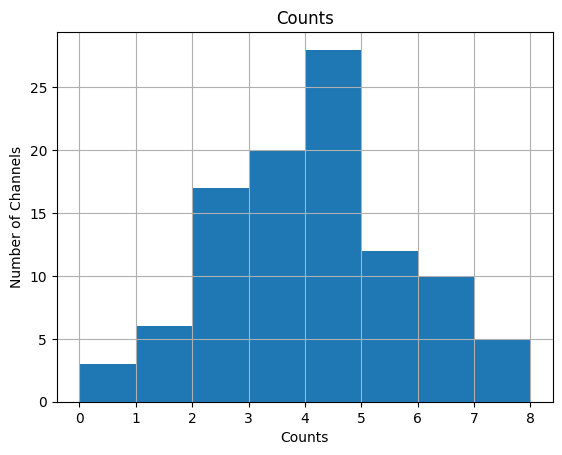

In [65]:
import pandas as pd
import numpy as np

cs137=pd.read_csv('Cs137Final.csv')
cs137['Channel'] = pd.to_numeric(cs137['Channel'])
cs137['Counts'] = pd.to_numeric(cs137['Counts'])
cs137_right = cs137[cs137["Channel"] >= 600]

#cs137_right

#hist = cs137_right.hist(["Counts"], bins=14)

cs137_right2 = cs137[cs137["Channel"] >= 600]
cs137_right3 = cs137_right2[cs137_right2["Channel"] <= 700]

hist = cs137_right3.hist(["Counts"], bins=8)
for ax in hist.flatten():
    ax.set_xlabel("Counts")
    ax.set_ylabel("Number of Channels")

bin_height, bin_borders = np.histogram(cs137_right3['Counts'], 8)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
print(bin_height, bin_borders, bin_centers)



4.080096527242851 2.778398702902299


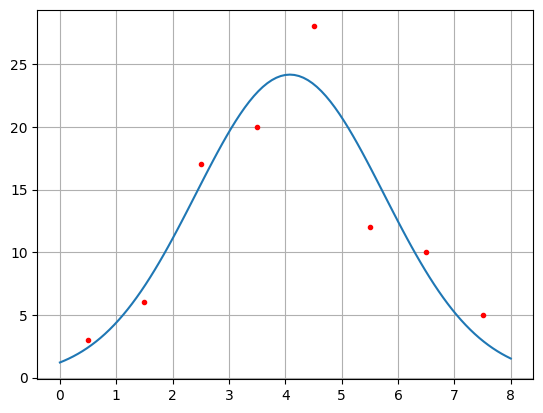

In [80]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit



def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - (x - mean)**2 / (2*standard_deviation ** 2))
    
x_interval = np.linspace(bin_borders[0], bin_borders[-1], 101)
x = x_interval.copy()


popt, _ = curve_fit(gaussian, bin_centers, bin_height, p0=[1., 0., 1.])

plt.plot(x_interval, gaussian(x_interval, *popt))
plt.grid()
plt.plot(bin_centers, bin_height, "r.")
#plt.plot(x_interval, cs137_right3.hist(["Counts"], bins=8))
#plt.grid()
print(popt[0], popt[2]**2)

Line Solution is y = 3.250673469387761x + 347.53693877550785
744.1191020408147


C:\Users\kozy8\AppData\Local\Temp\ipykernel_14932\2022678273.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, c = lstsq(A, y_coords)[0]


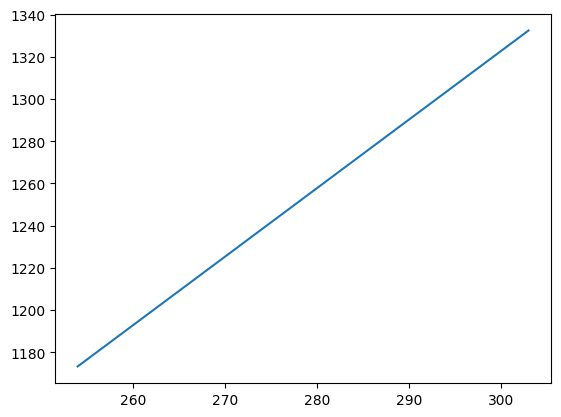

In [87]:
energies = [1173.208, 1332.491] #KeV
channels = [254, 303]

plt.plot(channels, energies)

from numpy.linalg import lstsq

points = [(channels[0], energies[0]),(channels[1],energies[1])]
x_coords, y_coords = zip(*points)
A = np.vstack([x_coords,np.ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("Line Solution is y = {m}x + {c}".format(m=m,c=c))


print(m*122+c)